In [15]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
lakeRst = rasterio.open('Final_DEM_Kulekhani_r.tif')
lakeRst.count

1

In [17]:
lakeRst.res

(5.000281660231666, 5.000281828839402)

In [21]:
lakeRst.crs

In [22]:
lakeBottom = lakeRst.read(1)

In [23]:
lakeBottom[:5,:5]

array([[-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
        -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
        -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
        -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
        -3.402823e+38],
       [-3.402823e+38, -3.402823e+38, -3.402823e+38, -3.402823e+38,
        -3.402823e+38]], dtype=float32)

In [24]:
noDataValue = np.copy(lakeBottom[0,0])

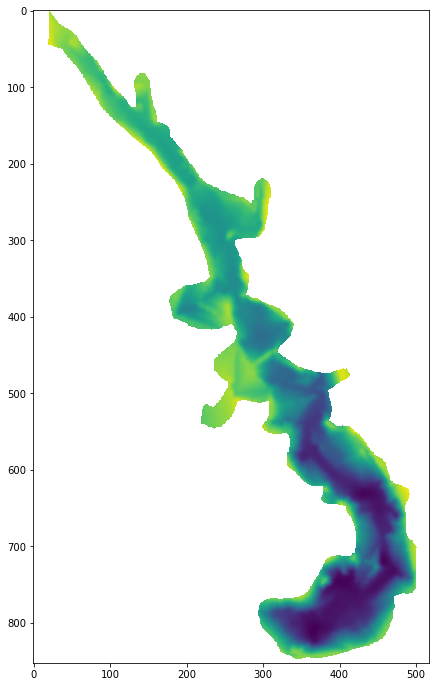

In [25]:
lakeBottom[lakeBottom==noDataValue]= np.nan
plt.figure(figsize=(12,12))
plt.imshow(lakeBottom)
plt.show()

In [26]:
# get raster minimum and maximum 
minElev = np.nanmin(lakeBottom)
maxElev = np.nanmax(lakeBottom)
print('Min bottom elevation %.2f m., max bottom elevation %.2f m.'%(minElev,maxElev))

# steps for calculation
nSteps = 1000

# lake bottom elevation intervals
elevSteps = np.round(np.linspace(minElev,maxElev,nSteps),2)
elevSteps

Min bottom elevation 1455.32 m., max bottom elevation 1541.75 m.


array([1455.32, 1455.4 , 1455.49, 1455.58, 1455.66, 1455.75, 1455.84,
       1455.92, 1456.01, 1456.1 , 1456.18, 1456.27, 1456.36, 1456.44,
       1456.53, 1456.62, 1456.7 , 1456.79, 1456.87, 1456.96, 1457.05,
       1457.13, 1457.22, 1457.31, 1457.39, 1457.48, 1457.57, 1457.65,
       1457.74, 1457.83, 1457.91, 1458.  , 1458.09, 1458.17, 1458.26,
       1458.35, 1458.43, 1458.52, 1458.61, 1458.69, 1458.78, 1458.86,
       1458.95, 1459.04, 1459.12, 1459.21, 1459.3 , 1459.38, 1459.47,
       1459.56, 1459.64, 1459.73, 1459.82, 1459.9 , 1459.99, 1460.08,
       1460.16, 1460.25, 1460.34, 1460.42, 1460.51, 1460.6 , 1460.68,
       1460.77, 1460.85, 1460.94, 1461.03, 1461.11, 1461.2 , 1461.29,
       1461.37, 1461.46, 1461.55, 1461.63, 1461.72, 1461.81, 1461.89,
       1461.98, 1462.07, 1462.15, 1462.24, 1462.33, 1462.41, 1462.5 ,
       1462.59, 1462.67, 1462.76, 1462.84, 1462.93, 1463.02, 1463.1 ,
       1463.19, 1463.28, 1463.36, 1463.45, 1463.54, 1463.62, 1463.71,
       1463.8 , 1463

In [27]:
# definition of volume function
def calculateVol(elevStep,elevDem,lakeRst):
    tempDem = elevStep - elevDem[elevDem<elevStep]
    tempVol = tempDem.sum()*lakeRst.res[0]*lakeRst.res[1]
    return tempVol

In [28]:
# calculate volumes for each elevation
volArray = []
for elev in elevSteps:
    tempVol = calculateVol(elev,lakeBottom,lakeRst)
    volArray.append(tempVol)

print("Lake bottom elevations %s"%elevSteps)
volArrayMCM = [round(i/1000000,2) for i in volArray]
print("Lake volume in million of cubic meters %s"%volArrayMCM)

Lake bottom elevations [1455.32 1455.4  1455.49 1455.58 1455.66 1455.75 1455.84 1455.92 1456.01
 1456.1  1456.18 1456.27 1456.36 1456.44 1456.53 1456.62 1456.7  1456.79
 1456.87 1456.96 1457.05 1457.13 1457.22 1457.31 1457.39 1457.48 1457.57
 1457.65 1457.74 1457.83 1457.91 1458.   1458.09 1458.17 1458.26 1458.35
 1458.43 1458.52 1458.61 1458.69 1458.78 1458.86 1458.95 1459.04 1459.12
 1459.21 1459.3  1459.38 1459.47 1459.56 1459.64 1459.73 1459.82 1459.9
 1459.99 1460.08 1460.16 1460.25 1460.34 1460.42 1460.51 1460.6  1460.68
 1460.77 1460.85 1460.94 1461.03 1461.11 1461.2  1461.29 1461.37 1461.46
 1461.55 1461.63 1461.72 1461.81 1461.89 1461.98 1462.07 1462.15 1462.24
 1462.33 1462.41 1462.5  1462.59 1462.67 1462.76 1462.84 1462.93 1463.02
 1463.1  1463.19 1463.28 1463.36 1463.45 1463.54 1463.62 1463.71 1463.8
 1463.88 1463.97 1464.06 1464.14 1464.23 1464.32 1464.4  1464.49 1464.58
 1464.66 1464.75 1464.83 1464.92 1465.01 1465.09 1465.18 1465.27 1465.35
 1465.44 1465.53 1465.61 1465.

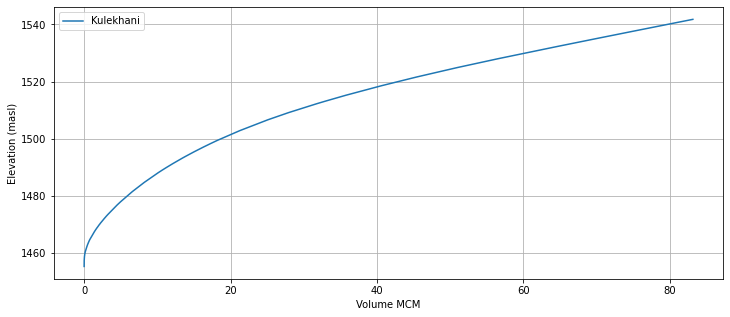

In [30]:
# plot values
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(volArrayMCM,elevSteps,label='Kulekhani')
ax.grid()
ax.legend()
ax.set_xlabel('Volume MCM')
ax.set_ylabel('Elevation (masl)')
plt.show()

In [31]:
from scipy.optimize import curve_fit


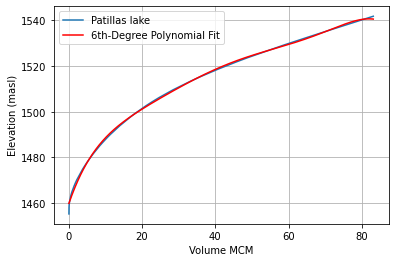

In [33]:
from scipy.optimize import curve_fit

# Define a 6th-degree polynomial fitting function
def sixth_degree_fit(elevation, a, b, c, d, e, f, g):
    return a * elevation**6 + b * elevation**5 + c * elevation**4 + d * elevation**3 + e * elevation**2 + f * elevation + g

# Perform the 6th-degree polynomial fit
popt, pcov = curve_fit(sixth_degree_fit, volArrayMCM, elevSteps)

# Plot the original data and the 6th-degree polynomial fit
plt.plot(volArrayMCM, elevSteps, label='Patillas lake')
plt.plot(volArrayMCM, sixth_degree_fit(np.array(volArrayMCM), *popt), 'r-', label='6th-Degree Polynomial Fit')
plt.grid()
plt.legend()
plt.xlabel('Volume MCM')
plt.ylabel('Elevation (masl)')
plt.show()


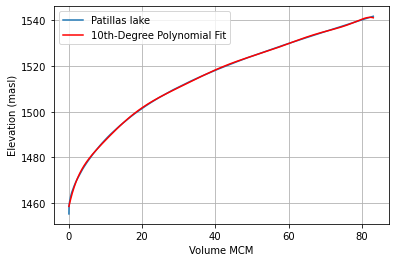

In [34]:
from scipy.optimize import curve_fit

# Define a 10th-degree polynomial fitting function
def tenth_degree_fit(elevation, *coefficients):
    result = 0
    for i, coeff in enumerate(coefficients):
        result += coeff * elevation**i
    return result

# Perform the 10th-degree polynomial fit
p0 = np.ones(11)  # Initial guess for coefficients
popt, pcov = curve_fit(tenth_degree_fit, volArrayMCM, elevSteps, p0=p0)

# Plot the original data and the 10th-degree polynomial fit
plt.plot(volArrayMCM, elevSteps, label='Patillas lake')
plt.plot(volArrayMCM, tenth_degree_fit(np.array(volArrayMCM), *popt), 'r-', label='10th-Degree Polynomial Fit')
plt.grid()
plt.legend()
plt.xlabel('Volume MCM')
plt.ylabel('Elevation (masl)')
plt.show()


In [35]:
# popt contains the optimized coefficients
coefficients = popt

# Define the function for the 10th-degree polynomial
def tenth_degree_polynomial(elevation):
    result = 0
    for i, coeff in enumerate(coefficients):
        result += coeff * elevation**i
    return result

# Print the equation
equation_terms = []
for i, coeff in enumerate(coefficients):
    term = f"{coeff:.2f} * elevation^{i}"
    equation_terms.append(term)

equation = " + ".join(equation_terms)
print(f"10th-Degree Polynomial Equation:\n{equation}")


10th-Degree Polynomial Equation:
1458.60 * elevation^0 + 7.21 * elevation^1 + -1.06 * elevation^2 + 0.11 * elevation^3 + -0.01 * elevation^4 + 0.00 * elevation^5 + -0.00 * elevation^6 + 0.00 * elevation^7 + -0.00 * elevation^8 + 0.00 * elevation^9 + -0.00 * elevation^10


In [36]:
# Print the equation with accurate coefficients
equation_terms = []
for i, coeff in enumerate(coefficients):
    term = f"{coeff:.6e} * elevation^{i}"
    equation_terms.append(term)

equation = " + ".join(equation_terms)
print(f"10th-Degree Polynomial Equation:\n{equation}")


10th-Degree Polynomial Equation:
1.458598e+03 * elevation^0 + 7.213620e+00 * elevation^1 + -1.064024e+00 * elevation^2 + 1.127221e-01 * elevation^3 + -7.158213e-03 * elevation^4 + 2.805009e-04 * elevation^5 + -6.962209e-06 * elevation^6 + 1.096578e-07 * elevation^7 + -1.061604e-09 * elevation^8 + 5.759454e-12 * elevation^9 + -1.339967e-14 * elevation^10
